In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Generate random data, "auto regressive model of order 1" (ARIMA)
x0 = 1 / (1 - 0.9)
sigma = 1 # Standard deviation
data = [x0]
for t in range(300):
    if t == 0:
        x = 1 + 0.9 * x0 + np.random.randn() * sigma
    else:
        x = 1 + 0.9 * x + np.random.randn() * sigma
    data.append(x)

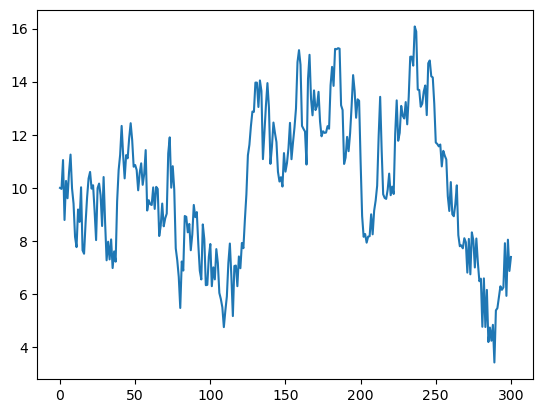

In [75]:
plt.plot(data)

In [76]:
series = pd.Series(data)

In [77]:
# Forward looking
z = (series - series.mean()) / series.std()

In [78]:
z_mean = z.rolling(window=30).mean()
z_std = z.rolling(window=30).std()
upper_bound = z_mean + 2 * z_std
lower_bound = z_mean - 2 * z_std

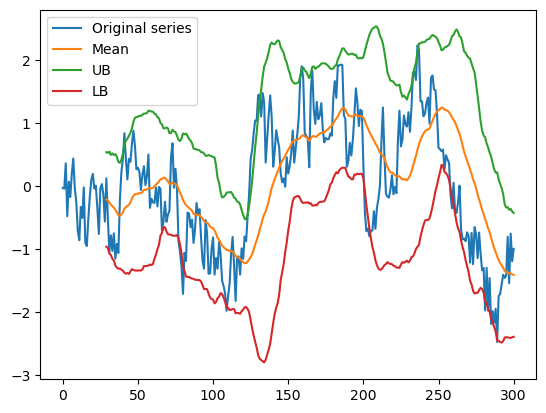

In [79]:
plt.plot(z, label="Original series")
plt.plot(z_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")
plt.legend()

In [80]:
long_signal = (z < lower_bound).astype(int)
short_signal = (z > upper_bound).astype(int)

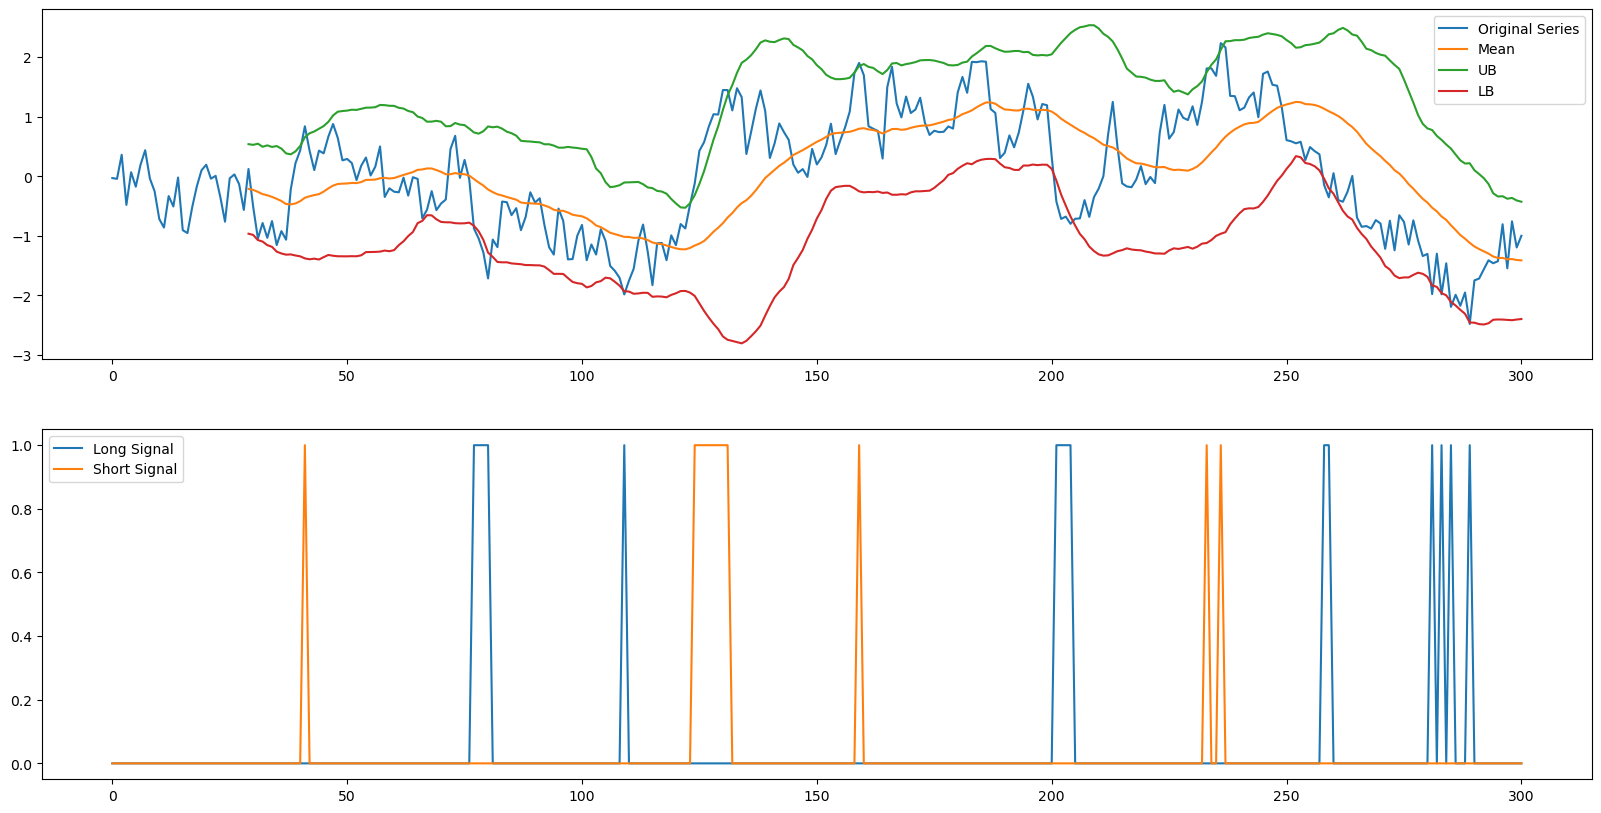

In [81]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label="Original Series")
plt.plot(z_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")
plt.legend()
plt.subplot(212)
plt.plot(long_signal, label="Long Signal")
plt.plot(short_signal, label="Short Signal")
plt.legend()

In [82]:
position = long_signal - short_signal

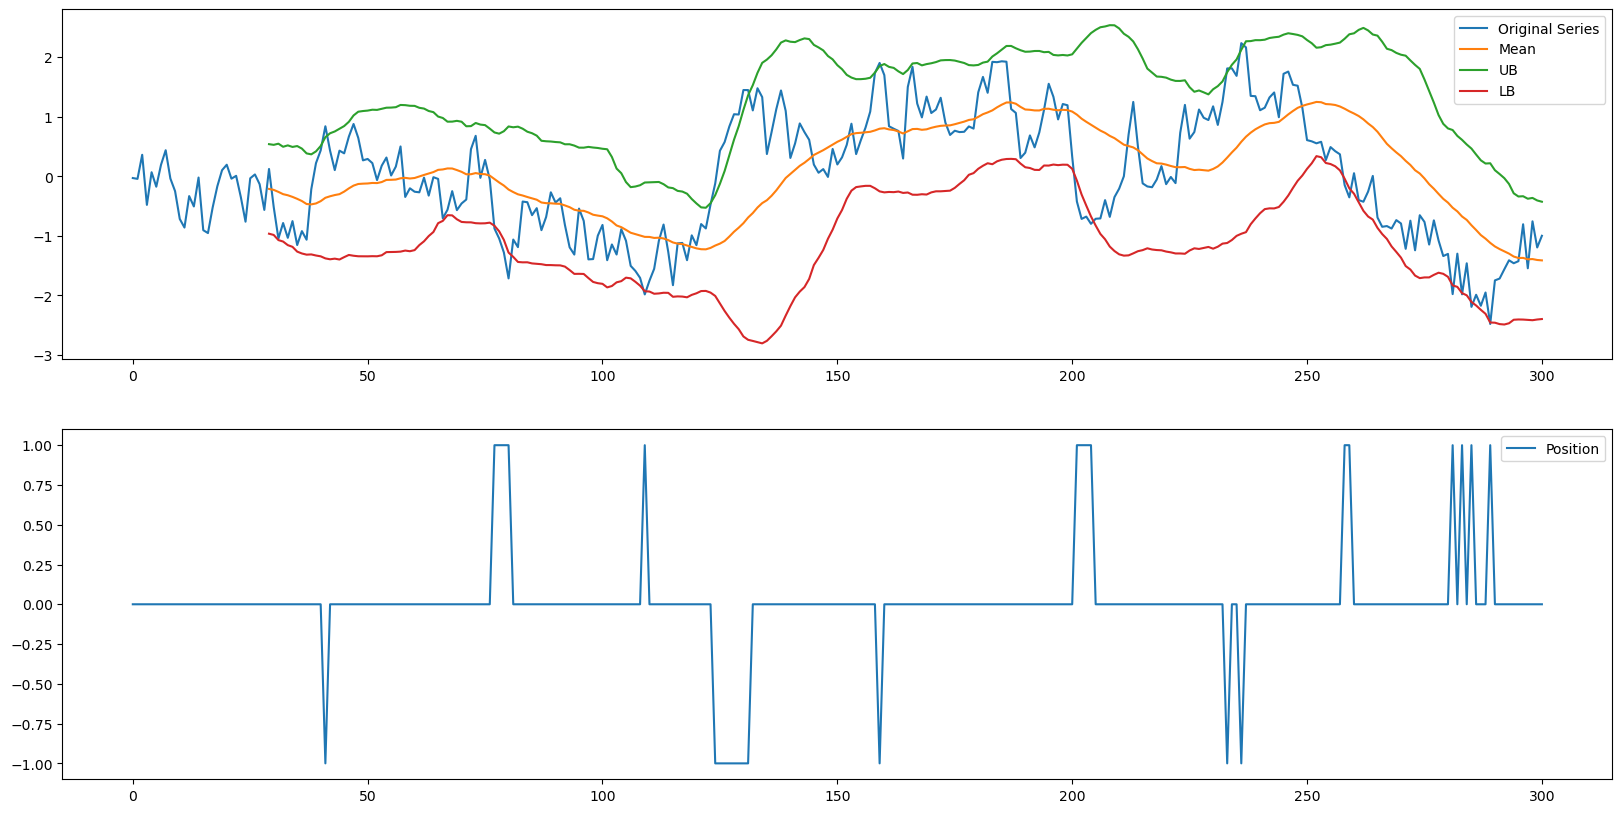

In [83]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label="Original Series")
plt.plot(z_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")
plt.legend()
plt.subplot(212)
plt.plot(position, label="Position")
plt.legend()

<Axes: >

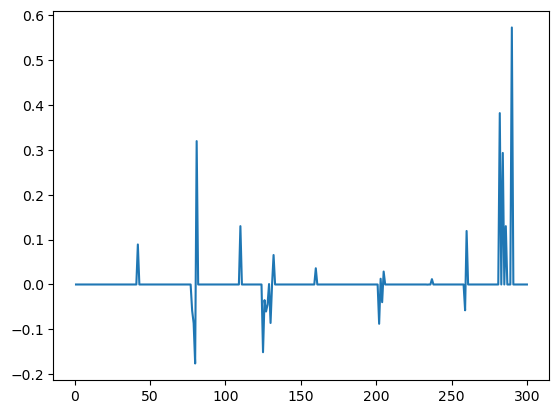

In [84]:
# Compute the cumulative return
daily_return = position.shift(1) * series.pct_change()
daily_return.plot()

<Axes: >

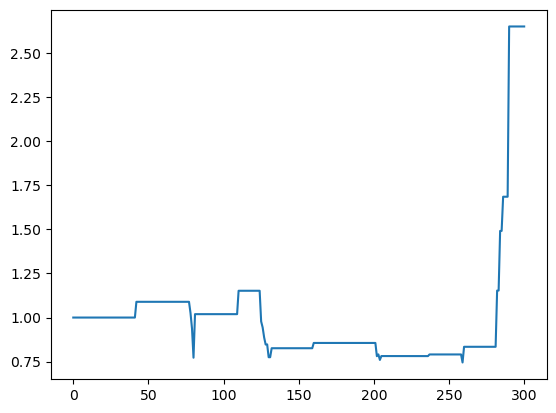

In [85]:
cumulative_return = (daily_return.fillna(value=0) + 1).cumprod()
cumulative_return.plot()

<Axes: >

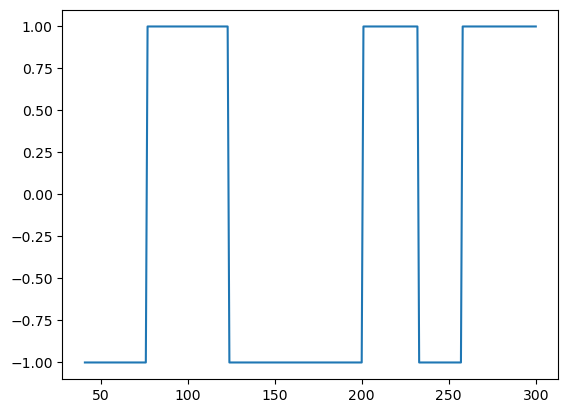

In [86]:
position_filled = position.copy()
position_filled[position == 0] = np.nan
position_filled = position_filled.ffill()
position_filled.plot()

In [87]:
position_filled.head(50)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41   -1.0
42   -1.0
43   -1.0
44   -1.0
45   -1.0
46   -1.0
47   -1.0
48   -1.0
49   -1.0
dtype: float64

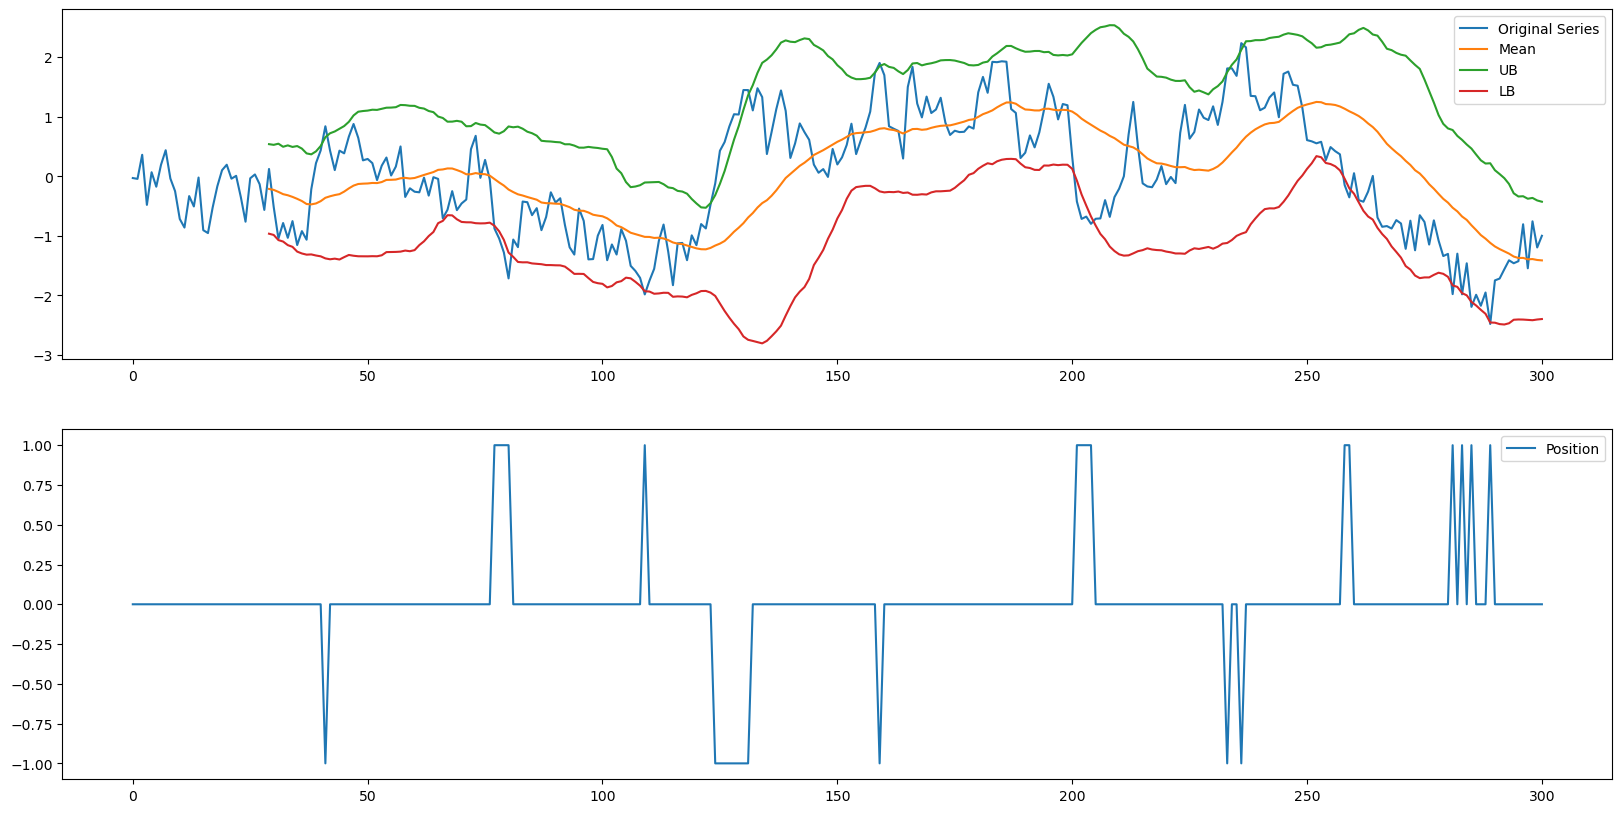

In [88]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label="Original Series")
plt.plot(z_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")
plt.legend()
plt.subplot(212)
plt.plot(position, label="Position")
plt.legend()

<Axes: >

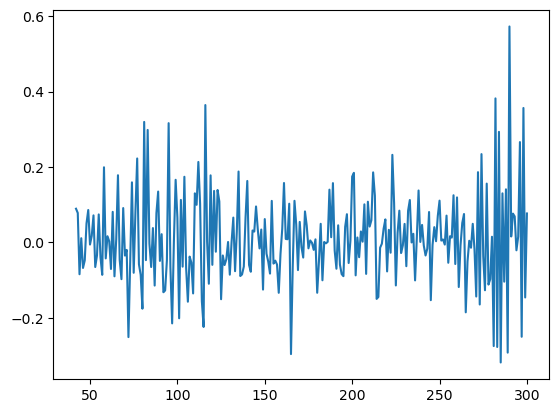

In [89]:
# Compute the cumulative return
daily_return2 = position_filled.shift(1) * series.pct_change()
daily_return2.plot()

In [90]:
daily_return2.head(50)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42    0.089163
43    0.077927
44   -0.084640
45    0.010937
46   -0.067899
47   -0.047927
48    0.050238
49    0.085789
dtype: float64

<Axes: >

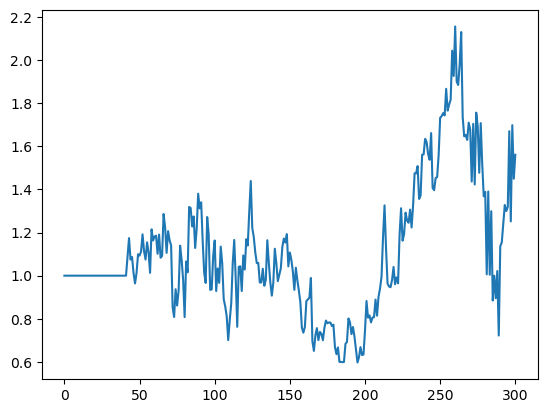

In [91]:
cumulative_return2 = (daily_return2.fillna(value=0) + 1).cumprod()
cumulative_return2.plot()

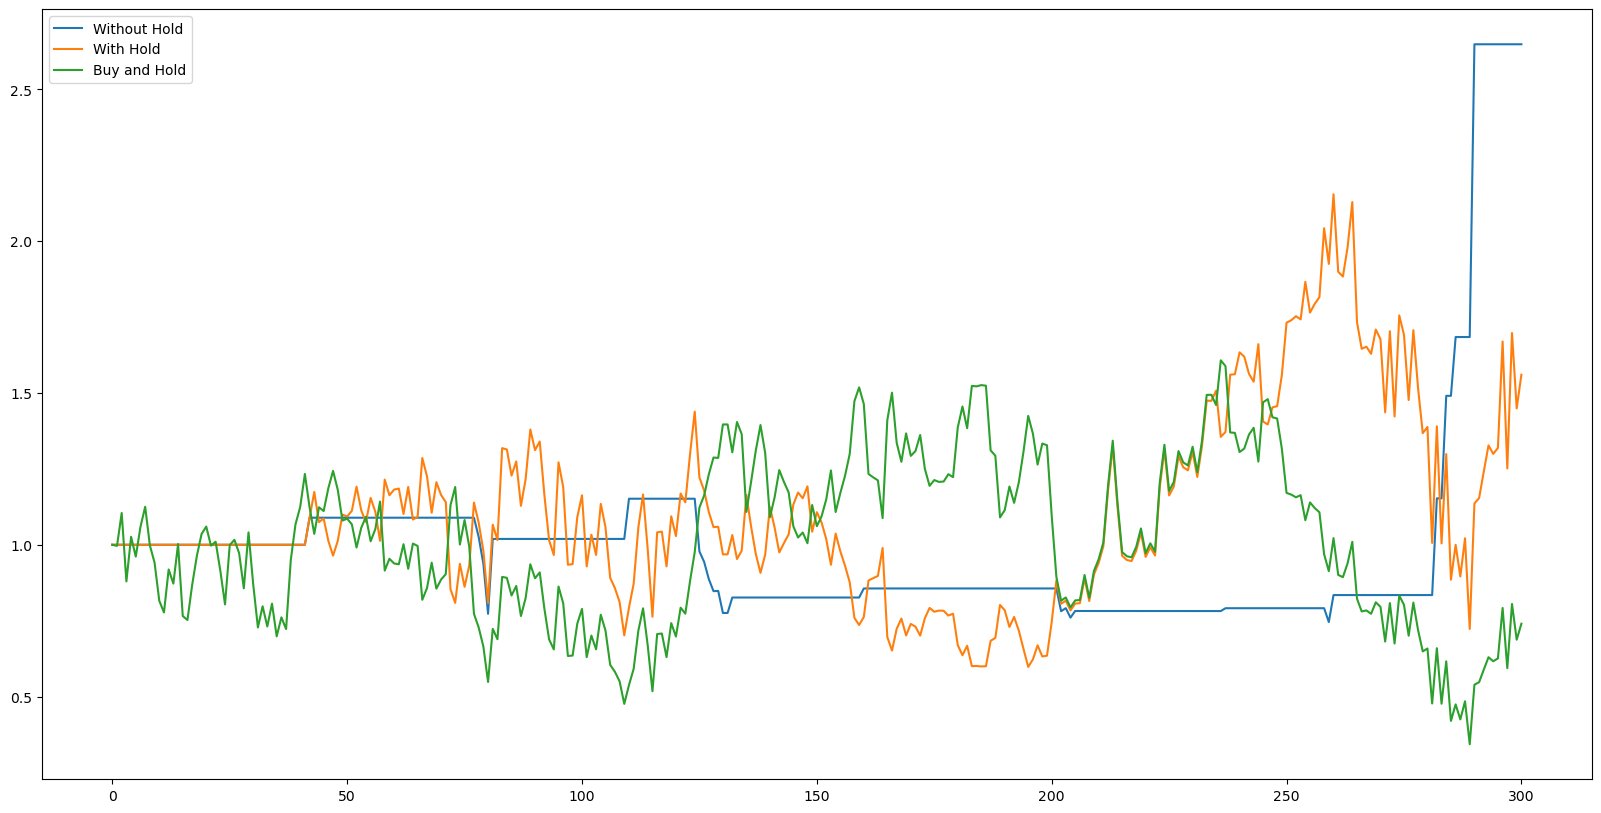

In [92]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative_return, label="Without Hold")
plt.plot(cumulative_return2, label="With Hold")
plt.plot(series / series.iloc[0], label="Buy and Hold")
plt.legend()

In [93]:
# Not future looking, so using a realistic rolling mean and std
series_mean = series.rolling(window=30).mean()
series_std = series.rolling(window=30).std()
z = (series - series_mean) / series_std

In [94]:
z_mean = z.rolling(window=30).mean()
z_std = z.rolling(window=30).std()
upper_bound = z_mean + 2 * z_std
lower_bound = z_mean - 2 * z_std

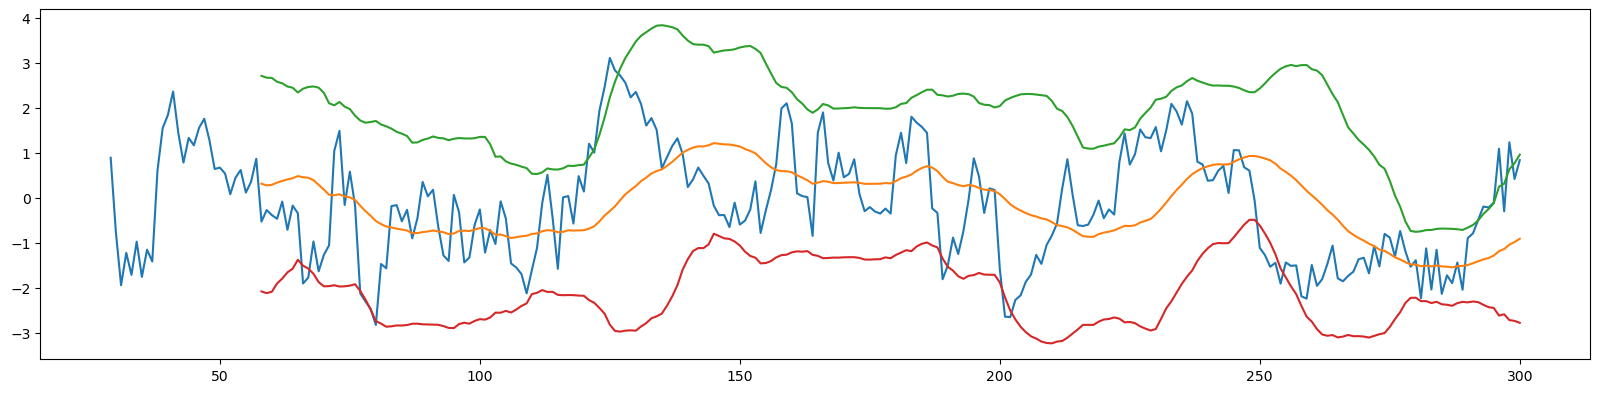

In [95]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label="Original Series")
plt.plot(z_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")

In [96]:
long_signal = (z < lower_bound).astype(int)
short_signal = (z > upper_bound).astype(int)

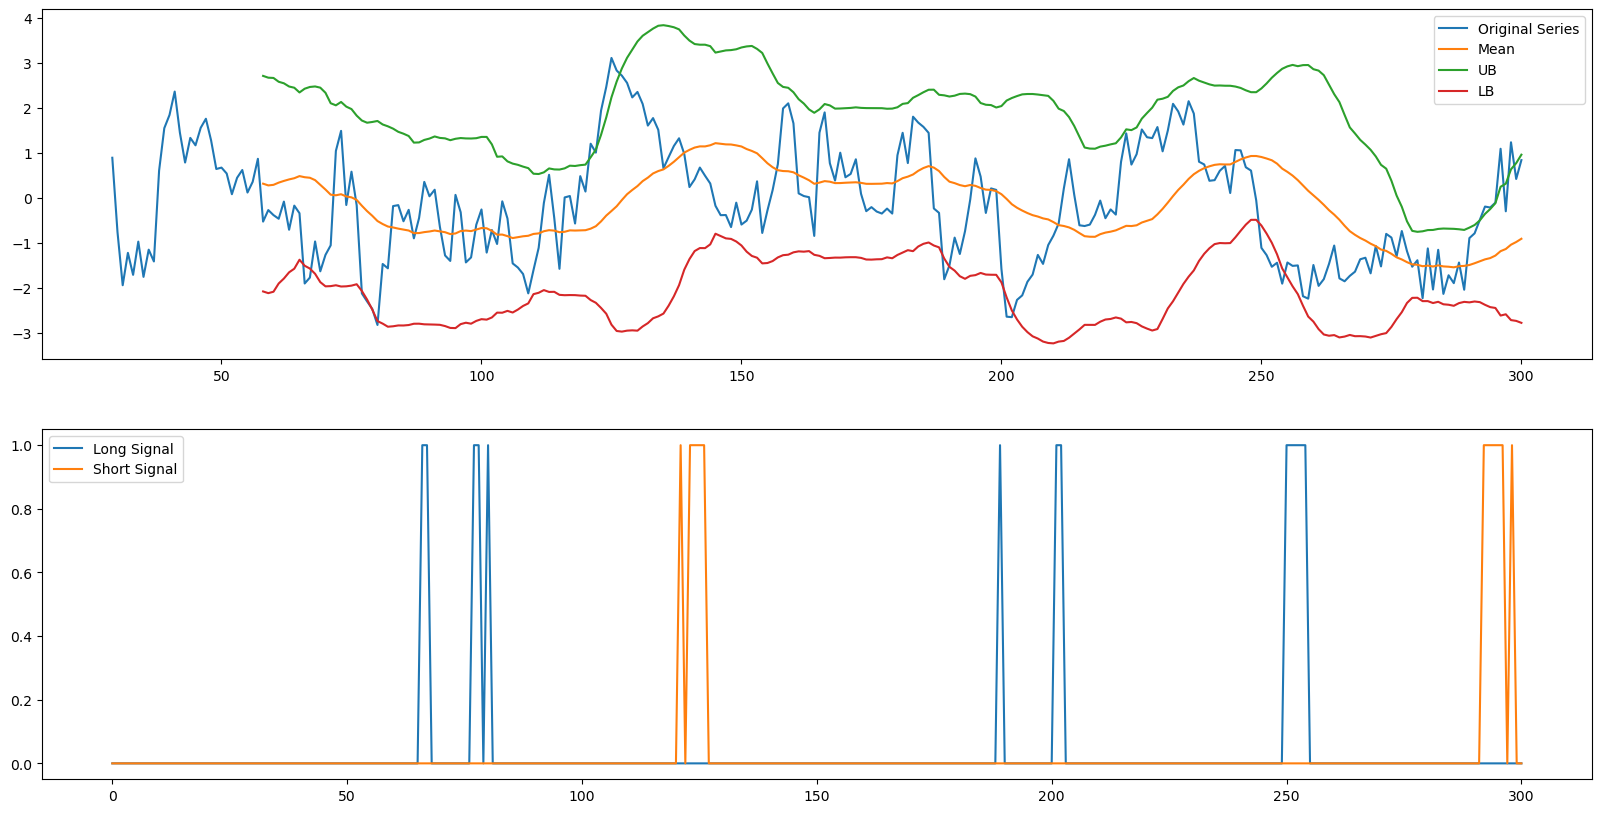

In [97]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label="Original Series")
plt.plot(z_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")
plt.legend()
plt.subplot(212)
plt.plot(long_signal, label="Long Signal")
plt.plot(short_signal, label="Short Signal")
plt.legend()

In [98]:
position = long_signal - short_signal

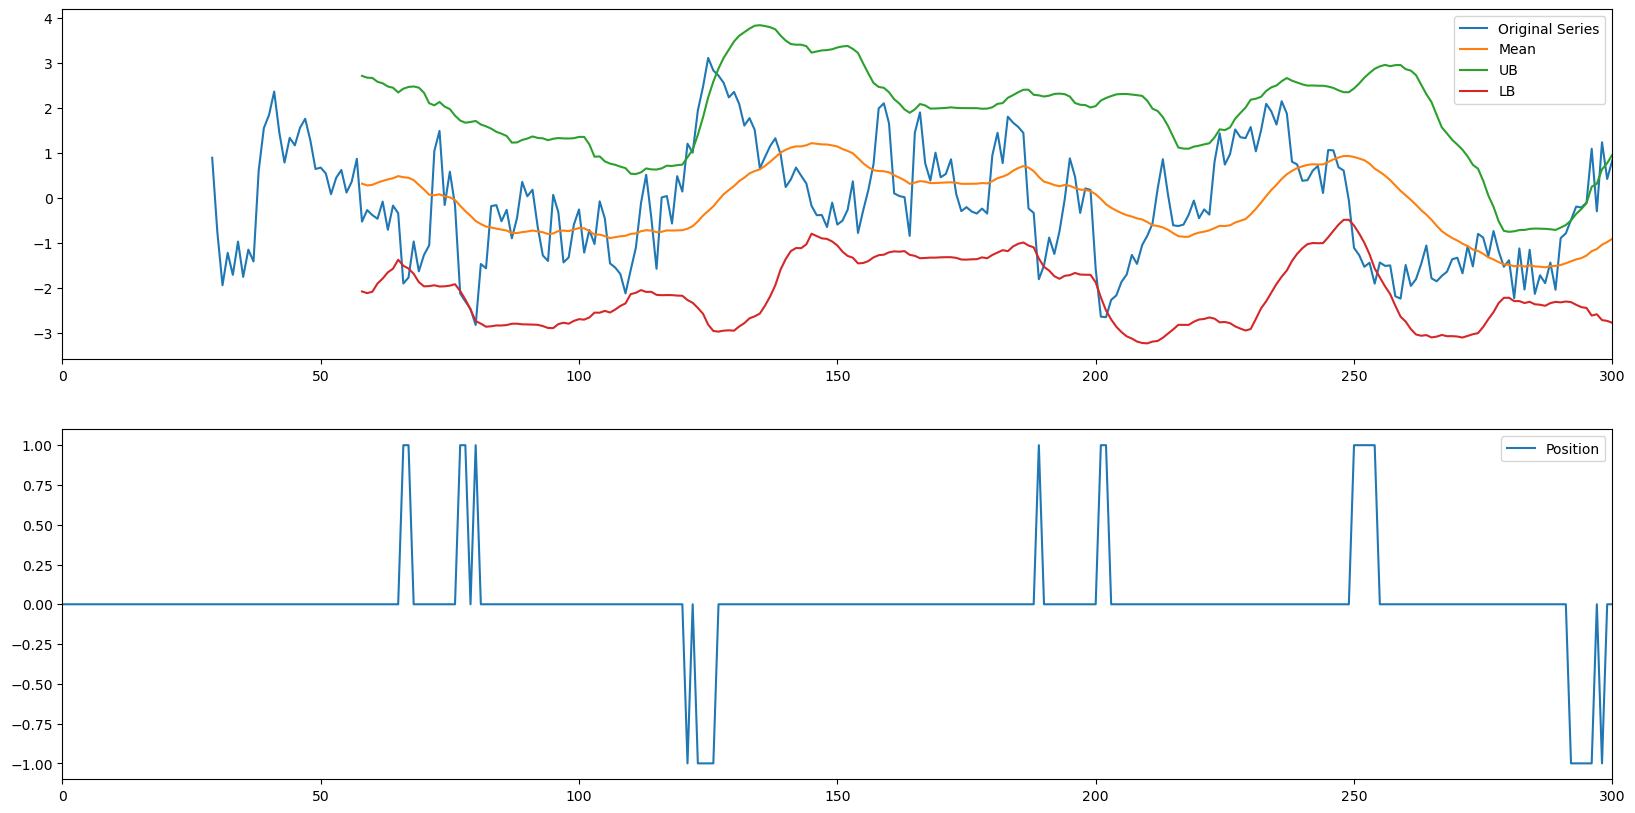

In [99]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label="Original Series")
plt.plot(z_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")
plt.xlim([0, 300])
plt.legend()
plt.subplot(212)
plt.plot(position, label="Position")
plt.xlim([0, 300])
plt.legend()

<Axes: >

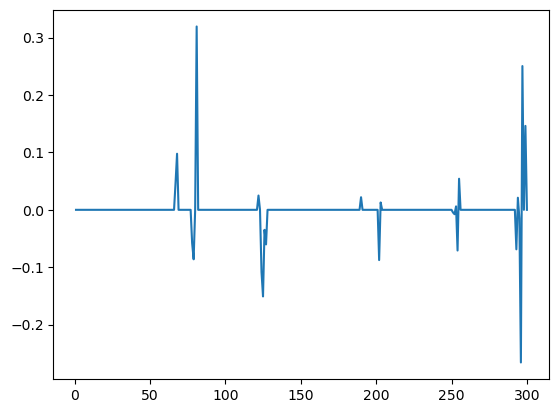

In [100]:
# Compute the cumulative return
daily_return = position.shift(1) * series.pct_change()
daily_return.plot()

<Axes: >

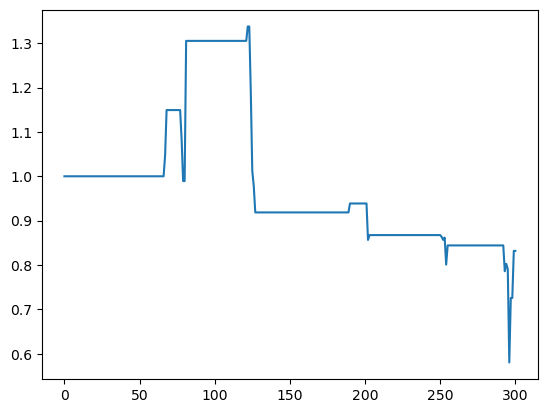

In [101]:
cumulative_return = (daily_return.fillna(value=0) + 1).cumprod()
cumulative_return.plot()

<Axes: >

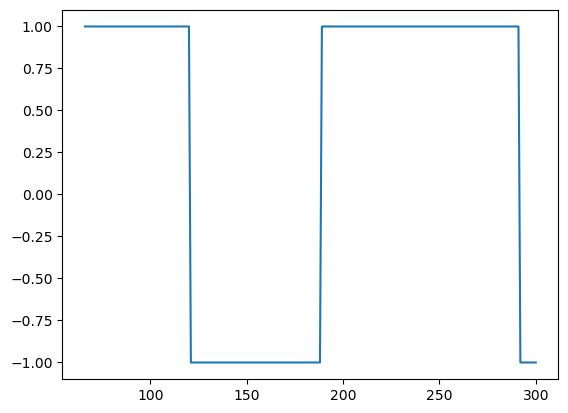

In [102]:
position_filled = position.copy()
position_filled[position == 0] = np.nan
position_filled = position_filled.ffill()
position_filled.plot()

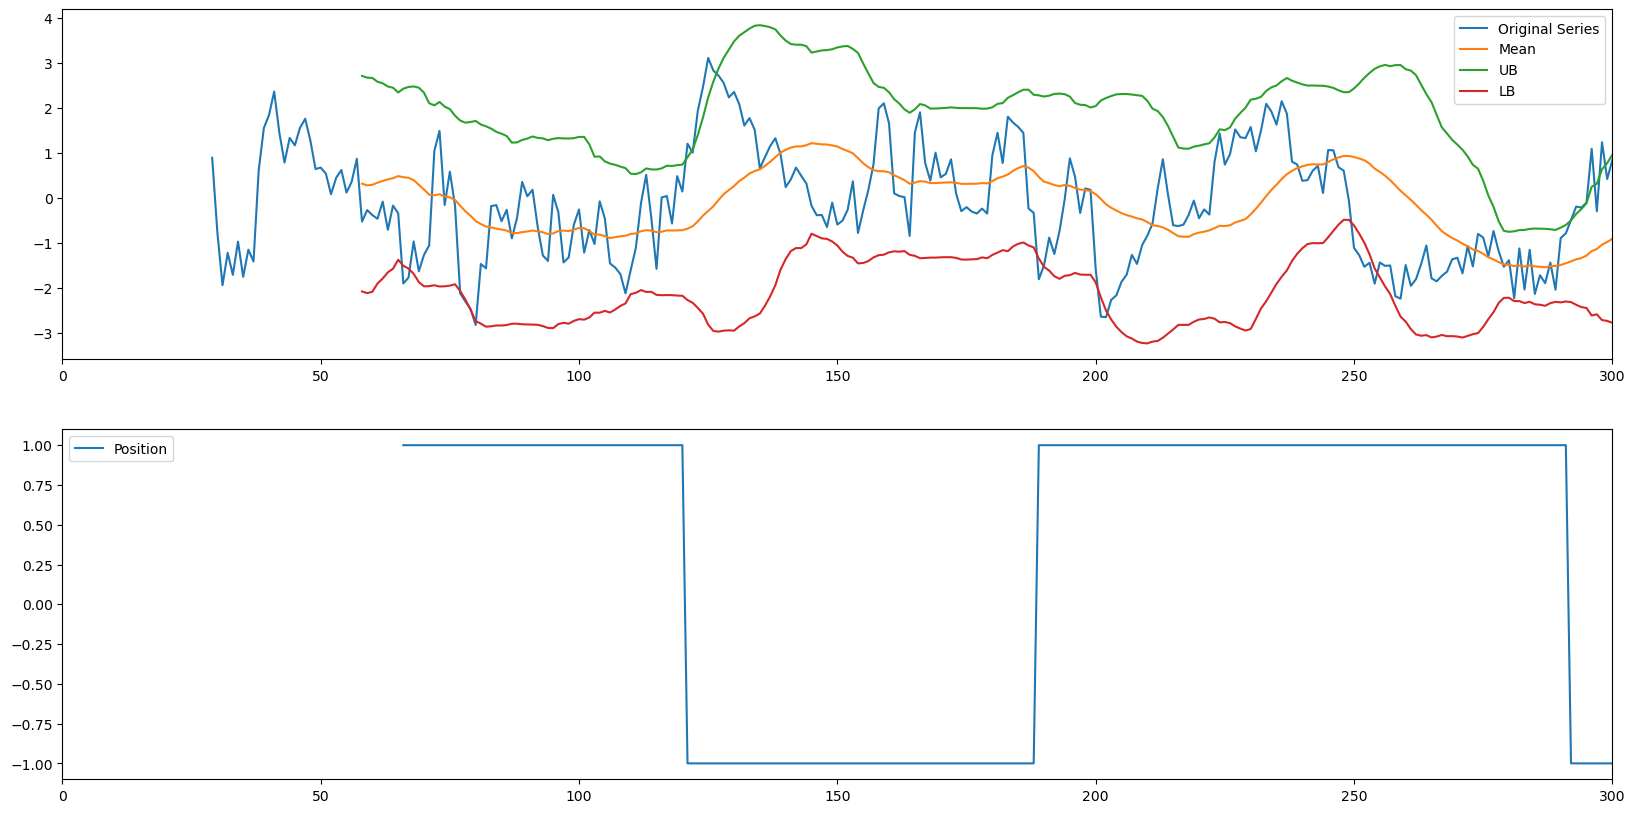

In [103]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label="Original Series")
plt.plot(z_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")
plt.xlim([0, 300])
plt.legend()
plt.subplot(212)
plt.plot(position_filled, label="Position")
plt.xlim([0, 300])
plt.legend()

<Axes: >

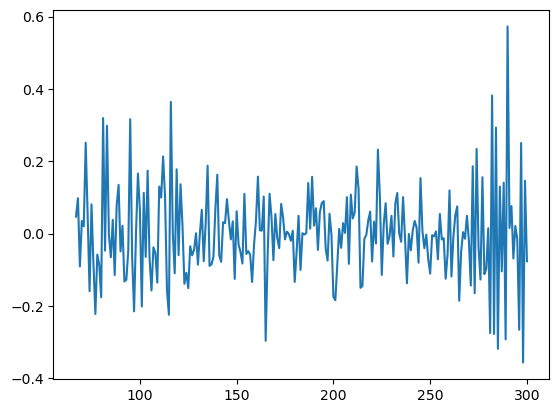

In [104]:
# Compute the cumulative return
daily_return2 = position_filled.shift(1) * series.pct_change()
daily_return2.plot()

<Axes: >

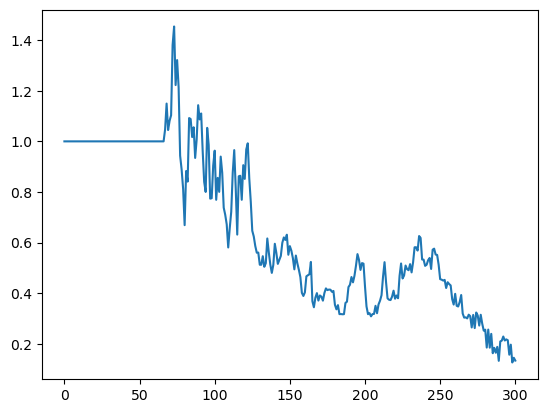

In [105]:
cumulative_return2 = (daily_return2.fillna(value=0) + 1).cumprod()
cumulative_return2.plot()

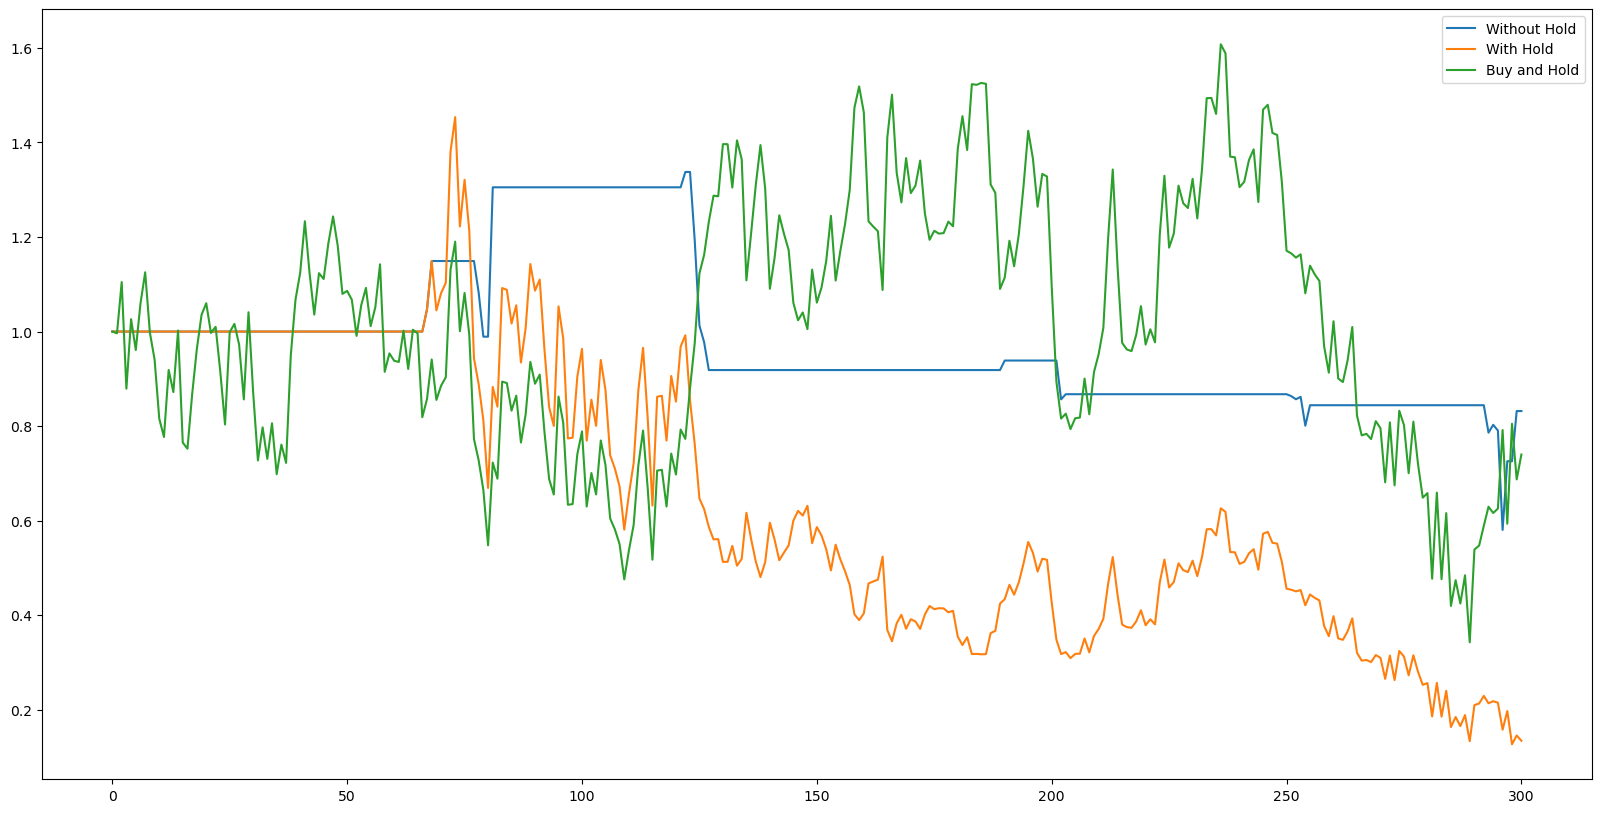

In [106]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative_return, label="Without Hold")
plt.plot(cumulative_return2, label="With Hold")
plt.plot(series / series.iloc[0], label="Buy and Hold")
plt.legend()